In [1]:
import tensorflow as tf
import numpy as py
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
fa=pd.read_csv("forestfires.csv")

In [4]:
fa

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
fa.shape

(517, 31)

In [6]:
fa.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
duplicate=fa[fa.duplicated()]
print("Duplicate Rows :")

Duplicate Rows :


In [8]:
fa.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [9]:
fa=fa.loc[:,['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct', 'monthsep', 'size_category']]
fa

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [10]:
x=fa.iloc[:,0:-1]
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y=fa.iloc[:,-1]
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [12]:
y.replace(to_replace=['small','large'],value=[0,1],inplace=True)
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: int64

In [13]:
y=y
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_tarin,y_test=train_test_split(x,y, test_size=0.2,random_state=10)

# creating model

In [16]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=28,activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                435       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 606
Trainable params: 606
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history=model.fit(x,y,validation_split=0.20, epochs=50, batch_size=100)

Epoch 1/50
5/5 [==============================] - 1s 59ms/step - loss: 0.6199 - accuracy: 0.7385 - val_loss: 0.6230 - val_accuracy: 0.7019
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 0.6053 - accuracy: 0.7385 - val_loss: 0.6176 - val_accuracy: 0.7019
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 0.5972 - accuracy: 0.7385 - val_loss: 0.6143 - val_accuracy: 0.7019
Epoch 4/50
5/5 [==============================] - 0s 10ms/step - loss: 0.5913 - accuracy: 0.7385 - val_loss: 0.6122 - val_accuracy: 0.7019
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 0.5874 - accuracy: 0.7385 - val_loss: 0.6104 - val_accuracy: 0.7019
Epoch 6/50
5/5 [==============================] - 0s 12ms/step - loss: 0.5838 - accuracy: 0.7385 - val_loss: 0.6091 - val_accuracy: 0.7019
Epoch 7/50
5/5 [==============================] - 0s 11ms/step - loss: 0.5808 - accuracy: 0.7385 - val_loss: 0.6082 - val_accuracy: 0.7019
Epoch 8/50
5/5 [===========

In [20]:
model.save_weights('mywt.kmw')

In [21]:
scores=model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.5171 - accuracy: 0.7311
accuracy: 73.11%


In [22]:
model.history.history.keys()
import matplotlib.pyplot as plt

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

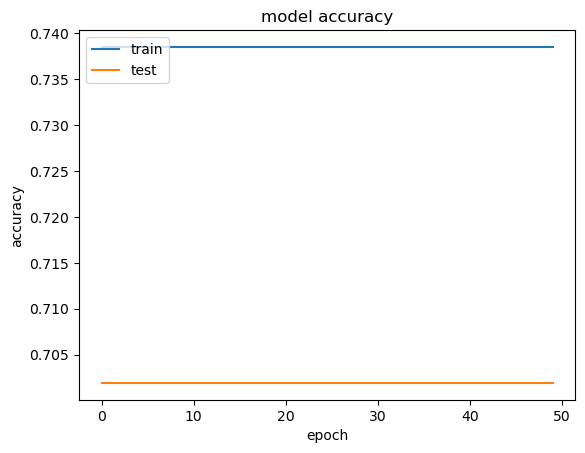

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

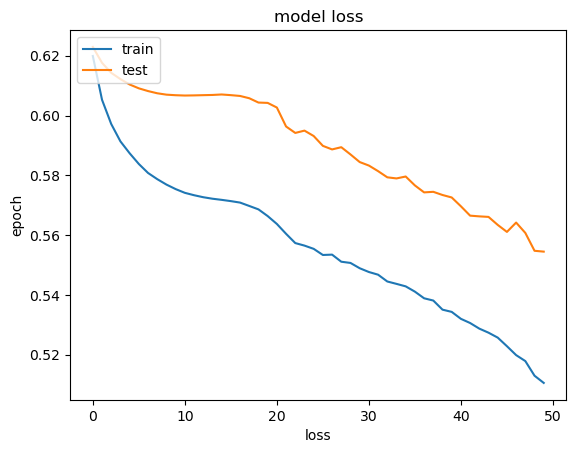

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [26]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=28,activation='ReLU'))
model.add(tf.keras.layers.Dense(10,activation='ReLU'))
model.add(tf.keras.layers.Dense(1,activation='ReLU'))

In [27]:
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
history=model.fit(x,y,validation_split=0.20, epochs=50, batch_size=100)

Epoch 1/50
5/5 [==============================] - 1s 44ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 3/50
5/5 [==============================] - 0s 10ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 6/50
5/5 [==============================] - 0s 12ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 8/50
5/5 

In [29]:
model.save_weights('mywt.kmw')

In [30]:
scores=model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 11.1493 - accuracy: 0.2689
accuracy: 26.89%


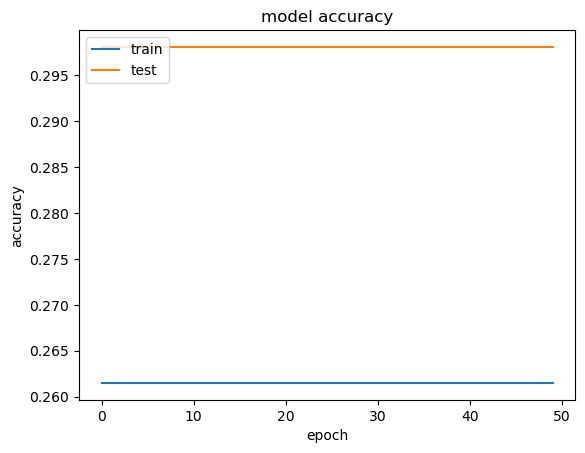

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

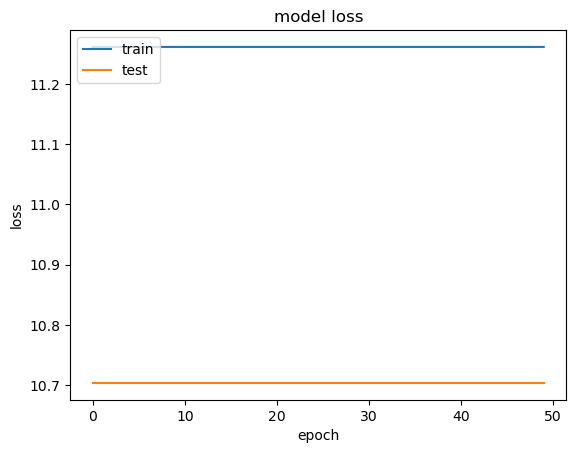

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()